# Automatic Text Summarization 

**Import Libraries**

In [17]:
import bs4 as bs  # Import BeautifulSoup for parsing HTML/XML content
import urllib.request as url  # Import urllib to fetch content from web URLs
import re  # Import regular expressions module for text cleaning
import nltk  # Import Natural Language Toolkit for NLP tasks
import matplotlib.pyplot as plt  # Import pyplot from matplotlib for plotting graphs

nltk.download('punkt')  # Download tokenizer models for sentence/word tokenization
nltk.download('stopwords')  # Download list of common stopwords for filtering

from nltk.tokenize import sent_tokenize, word_tokenize  # Import functions to split text into sentences and words
from nltk.corpus import stopwords  # Import stopwords list from NLTK
from nltk.probability import FreqDist  # Import class to calculate word frequency distribution
import heapq  # Import heapq to extract top elements efficiently (e.g., top sentences)
from string import punctuation  # Import list of punctuation symbols for text cleaning


[nltk_data] Downloading package punkt to C:\Users\Mustafa
[nltk_data]     Husain\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Mustafa
[nltk_data]     Husain\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Fetch Articles from Wikipedia**

In [18]:
# web scrape Wikipedia article on Management Systems
# and parse the content to extract text
scraped_data = url.urlopen('https://en.wikipedia.org/wiki/Management_system')  # Open the URL and fetch HTML content from the Wikipedia page
article = scraped_data.read()  # Read the raw HTML content from the response
parsed_article = bs.BeautifulSoup(article, 'lxml')  # Parse the HTML content using the lxml parser
paragraphs = parsed_article.find_all('p')  # Find all paragraph tags <p> in the parsed HTML

article_text = ""  # Initialize an empty string to store the complete article text

for p in paragraphs:
    article_text += p.text  # Append the text content of each paragraph to the article_text


In [3]:
article_text

'A management system is a set of policies, processes and procedures used by an organization to ensure that it can fulfill the tasks required to achieve its objectives.[1] These objectives cover many aspects of the organization\'s operations (including product quality, worker management, safe operation, client relationships, regulatory conformance and financial success). For instance, a quality management system enables organizations to improve their quality performance, an environmental management system enables organizations to improve their environmental performance, and an occupational health and safety management system enables organizations to improve their occupational health and safety performance, can be run in an integrated management system.\nThe international standard ISO 9000:2015 (Title: Quality management systems - fundamentals and vocabulary) defines the term in chapter 3.5.3 as a "set of interrelated or interacting elements of an organization to establish policies and o

**Text Preprocessing**

In [4]:
# remove square brackets and extra spaces
article_text = re.sub(r'\[[0-9]*\]', ' ', article_text)
article_text = re.sub(r'\s+', ' ', article_text)

In [5]:
# remove special characters and digits
formatted_article_text = re.sub('[^a-zA-Z]', ' ', article_text )
formatted_article_text = re.sub(r'\s+', ' ', formatted_article_text)

**Tokenize Sentences**

In [19]:
sentence_list = nltk.sent_tokenize(article_text)  # Split the cleaned article text into a list of sentences using NLTK's sentence tokenizer


**Find Weighted Frequency of Occurrence**

In [21]:
stopwords = nltk.corpus.stopwords.words('english')  # Load a list of common English stopwords (like "the", "is", "and") from NLTK

In [22]:
word_frequencies = {}  # Initialize an empty dictionary to store word frequencies

for word in nltk.word_tokenize(formatted_article_text):  # Tokenize the formatted article into individual words
    if word not in stopwords and word not in punctuation:  # Ignore stopwords and punctuation
        if word not in word_frequencies.keys():  # If the word is not already in the dictionary
            word_frequencies[word] = 1  # Add it with a frequency of 1
        else:
            word_frequencies[word] += 1  # Otherwise, increment its existing frequency by 1


In [9]:
word_frequencies

{'A': 3,
 'management': 13,
 'system': 9,
 'set': 2,
 'policies': 2,
 'processes': 2,
 'procedures': 1,
 'used': 1,
 'organization': 4,
 'ensure': 1,
 'fulfill': 1,
 'tasks': 1,
 'required': 1,
 'achieve': 3,
 'objectives': 5,
 'These': 1,
 'cover': 1,
 'many': 1,
 'aspects': 2,
 'operations': 1,
 'including': 1,
 'product': 1,
 'quality': 3,
 'worker': 1,
 'safe': 1,
 'operation': 1,
 'client': 1,
 'relationships': 1,
 'regulatory': 1,
 'conformance': 1,
 'financial': 1,
 'success': 1,
 'For': 1,
 'instance': 1,
 'enables': 3,
 'organizations': 3,
 'improve': 3,
 'performance': 4,
 'environmental': 2,
 'occupational': 2,
 'health': 2,
 'safety': 2,
 'run': 1,
 'integrated': 1,
 'The': 2,
 'international': 1,
 'standard': 1,
 'ISO': 1,
 'Title': 1,
 'Quality': 1,
 'systems': 1,
 'fundamentals': 1,
 'vocabulary': 1,
 'defines': 1,
 'term': 1,
 'chapter': 1,
 'interrelated': 1,
 'interacting': 1,
 'elements': 1,
 'establish': 1,
 'simplification': 1,
 'main': 1,
 'element': 1,
 'plan': 1

In [23]:
maximum_frequncy = max(word_frequencies.values())  # Find the highest word frequency in the dictionary

for word in word_frequencies.keys():
    word_frequencies[word] = (word_frequencies[word] / maximum_frequncy)  # Normalize each word's frequency by dividing by the maximum


In [11]:
word_frequencies

{'A': 0.23076923076923078,
 'management': 1.0,
 'system': 0.6923076923076923,
 'set': 0.15384615384615385,
 'policies': 0.15384615384615385,
 'processes': 0.15384615384615385,
 'procedures': 0.07692307692307693,
 'used': 0.07692307692307693,
 'organization': 0.3076923076923077,
 'ensure': 0.07692307692307693,
 'fulfill': 0.07692307692307693,
 'tasks': 0.07692307692307693,
 'required': 0.07692307692307693,
 'achieve': 0.23076923076923078,
 'objectives': 0.38461538461538464,
 'These': 0.07692307692307693,
 'cover': 0.07692307692307693,
 'many': 0.07692307692307693,
 'aspects': 0.15384615384615385,
 'operations': 0.07692307692307693,
 'including': 0.07692307692307693,
 'product': 0.07692307692307693,
 'quality': 0.23076923076923078,
 'worker': 0.07692307692307693,
 'safe': 0.07692307692307693,
 'operation': 0.07692307692307693,
 'client': 0.07692307692307693,
 'relationships': 0.07692307692307693,
 'regulatory': 0.07692307692307693,
 'conformance': 0.07692307692307693,
 'financial': 0.076

**Frequency Distribution**

<Axes: xlabel='Samples', ylabel='Counts'>

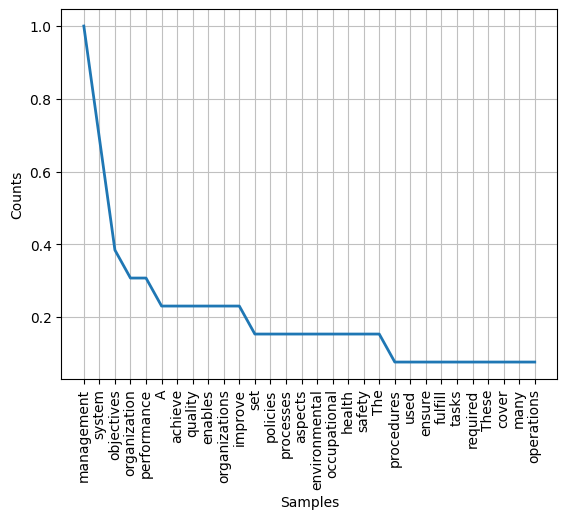

In [12]:
frequency_dist = nltk.FreqDist(word_frequencies)
frequency_dist.plot(30)

**Calculate Sentence Scores**

In [24]:
sentence_scores = {}  # Initialize an empty dictionary to store sentence scores

for sent in sentence_list:  # Iterate over each sentence in the list
    for word in nltk.word_tokenize(sent.lower()):  # Tokenize the sentence into words (in lowercase)
        if word in word_frequencies.keys():  # Check if the word is in the word frequency dictionary
            if len(sent.split(' ')) < 30:  # Consider only sentences shorter than 30 words
                if sent not in sentence_scores.keys():  # If the sentence is not already scored
                    sentence_scores[sent] = word_frequencies[word]  # Initialize its score with the word’s frequency
                else:
                    sentence_scores[sent] += word_frequencies[word]  # Add the word’s frequency to the existing sentence score


In [25]:
sentence_scores

{'A management system is a set of policies, processes and procedures used by an organization to ensure that it can fulfill the tasks required to achieve its objectives.': 3.5384615384615397,
 "[1] These objectives cover many aspects of the organization's operations (including product quality, worker management, safe operation, client relationships, regulatory conformance and financial success).": 3.153846153846155,
 '[2]\nA simplification of the main aspects of a management system is the 4-element "plan, do, check, act" approach.': 2.3076923076923084,
 'A complete management system covers every aspect of management and focuses on supporting the performance management to achieve the objectives.': 5.0769230769230775,
 'The management system should be subject to continuous improvement as the organization learns.': 2.307692307692308,
 'Examples of management system standards include:': 1.846153846153846}

**Extract Output Summary**

In [30]:
summary

'A management system is a set of policies, processes and procedures used by an organization to ensure that it can fulfill the tasks required to achieve its objectives. These objectives cover many aspects of the organization\'s operations (including product quality, worker management, safe operation, client relationships, regulatory conformance and financial success). For instance, a quality management system enables organizations to improve their quality performance, an environmental management system enables organizations to improve their environmental performance, and an occupational health and safety management system enables organizations to improve their occupational health and safety performance, can be run in an integrated management system. A simplification of the main aspects of a management system is the 4-element "plan, do, check, act" approach. A complete management system covers every aspect of management and focuses on supporting the performance management to achieve the 